# Práctica 8

Ahora es tu turno de trabajar con modelos de lenguaje y self-supervised learning.

## Ejercicio obligatorio (5 puntos)

El ejercicio que tenéis que realizar obligatoriamente consiste en usar el dataset de clasificación de texto que empleaste en la práctica anterior para construir un modelo siguiendo las instrucciones proporcionadas en el notebook de instrucciones. Además debes comparar los resultados obtenidos con los que lograste en la práctica anterior. 

## Ejercicio opcional 1 (0.5 puntos)

Crea un nuevo espacio en HuggingFace con el nuevo modelo que has creado.

## Ejercicio opcional 2 (4.5 puntos)

El ejercicio opcional está centrado en investigar cómo utilizar self-supervised learning para clasificación de imágenes. Para ello crea un nuevo notebook donde reproduzcas los resultados de la parte obligatoria de la Práctica 1. A continuación realiza los siguientes ejercicios:
- Entrena el modelo desde cero (mira qué hace el parámetro `pretrained` del método `cnn_learner`. 
- Usando la librería [Self Supervised Learning Fastai Extension](https://github.com/KeremTurgutlu/self_supervised) entrena tres modelos de self-supervised usando los algoritmos SimCLR, BYOL, y SwAV disponibles en dicha librería.
- A partir de los modelos de self-supervised entrenados en el paso anterior, crea nuevos modelos de clasificación. 


Al finalizar, recuerda guardar los cambios en GitHub utilizando la opción Archivo -> Guardar una copia en GitHub.


## Librerías

Comenzamos actualizando la librería FastAI y descargando la librería datasets de HuggingFace. Al finalizar la instalación deberás reiniciar el kernel (menú Entorno de ejecución -> Reiniciar Entorno de ejecución).

In [1]:
!pip install fastai -Uqq
!pip install datasets -Uqq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 4.1 MB/s eta 0:00:00


Cargamos a continuación las librerías que necesitaremos en esta práctica que son la parte de procesado de lenguaje natural de la librería fastAI, la librería pandas, y la funcionalidad para cargar datasets de HuggingFace.

In [2]:
import pandas as pd
from fastai.text.all import *
from datasets import load_dataset

## Dataset

Para este ejemplo vamos a usar el dataset [clinc_oos](https://huggingface.co/datasets/clinc_oos), un dataset para detectar 150 clases de intención en 10 dominios, el conjunto de datos contiene una etiqueta para la intención "fuera del ámbito".( Label Id | Label name | |--- |--- | | 0 | restaurant_reviews | | 1 | nutrition_info | | 2 | account_blocked | | 3 | oil_change_how | | 4 | time | | 5 | weather | | 6 | redeem_rewards | | 7 | interest_rate | | 8 | gas_type | | 9 | accept_reservations | | 10 | smart_home | | 11 | user_name | | 12 | report_lost_card | | 13 | repeat | | 14 | whisper_mode | | 15 | what_are_your_hobbies | | 16 | order | | 17 | jump_start | | 18 | schedule_meeting | | 19 | meeting_schedule | | 20 | freeze_account | | 21 | what_song | | 22 | meaning_of_life | | 23 | restaurant_reservation | | 24 | traffic | | 25 | make_call | | 26 | text | | 27 | bill_balance ..)
Descarga el dataset usando el siguiente comando. 

In [3]:
clinc_oos_dataset = load_dataset("clinc_oos",'small')

Generating train split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5500 [00:00<?, ? examples/s]

Dataset clinc_oos downloaded and prepared to /root/.cache/huggingface/datasets/clinc_oos/small/1.0.0/abcc41d382f8137f039adc747af44714941e8196e845dfbdd8ae7a7e020e6ba1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
clinc_oos_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'intent'],
        num_rows: 7600
    })
    validation: Dataset({
        features: ['text', 'intent'],
        num_rows: 3100
    })
    test: Dataset({
        features: ['text', 'intent'],
        num_rows: 5500
    })
})

Podemos ver que el dataset es una estructura DatasetDict que puede verse como un diccionario. El diccionario tiene tres claves que son train, validation y test que indican respectivamente los conjuntos de entrenamiento, validación y test (estas claves pueden variar dependiendo del dataset). Cada uno de estos subconjuntos es un Dataset que puede verse como una lista. Podemos ver por ejemplo la primera frase del conjunto de entrenamiento del siguiente modo.

## Carga de datos

Cargamos a continuación el dataset en distintos dataframes de pandas (el formato que puede leer la librería de FastAI).

In [9]:
train_df = clinc_oos_dataset["train"].to_pandas()
valid_df = clinc_oos_dataset["validation"].to_pandas()
test_df = clinc_oos_dataset["test"].to_pandas()

Podemos ver el contenido del dataset usando el siguiente comando.

In [10]:
train_df

text  \
0     can you walk me through setting up direct deposits to my bank of internet savings account   
1                                                            i want to switch to direct deposit   
2                                                                  set up direct deposit for me   
3                                                   how do i go about setting up direct deposit   
4                                i need to get my paycheck direct deposited to my chase account   
...                                                                                         ...   
7595                                     what percentage of species display cold blooded traits   
7596                                                      what does it mean to be an alpha male   
7597                                                              what animals have alpha males   
7598                                                              why do males want to be alpha   
7599                                        what's the average battery life of an android phone   

      intent  
0        108  
1        108  
2        108  
3        108  
4        108  
...      ...  
7595      42  
7596      42  
7597      42  
7598      42  
7599      42  

[7600 rows x 2 columns]

Del dataset nos interesan dos campos: `text` (que contiene el poema) y `intent` .

In [11]:
train_df['text']

0       can you walk me through setting up direct deposits to my bank of internet savings account
1                                                              i want to switch to direct deposit
2                                                                    set up direct deposit for me
3                                                     how do i go about setting up direct deposit
4                                  i need to get my paycheck direct deposited to my chase account
                                                  ...                                            
7595                                       what percentage of species display cold blooded traits
7596                                                        what does it mean to be an alpha male
7597                                                                what animals have alpha males
7598                                                                why do males want to be alpha
7599                

## Dataset

Para este ejemplo vamos a usar el dataset [clinc_oos](https://huggingface.co/datasets/clinc_oos), un dataset para detectar 150 clases de intención en 10 dominios, el conjunto de datos contiene una etiqueta para la intención "fuera del ámbito".( Label Id | Label name | |--- |--- | | 0 | restaurant_reviews | | 1 | nutrition_info | | 2 | account_blocked | | 3 | oil_change_how | | 4 | time | | 5 | weather | | 6 | redeem_rewards | | 7 | interest_rate | | 8 | gas_type | | 9 | accept_reservations | | 10 | smart_home | | 11 | user_name | | 12 | report_lost_card | | 13 | repeat | | 14 | whisper_mode | | 15 | what_are_your_hobbies | | 16 | order | | 17 | jump_start | | 18 | schedule_meeting | | 19 | meeting_schedule | | 20 | freeze_account | | 21 | what_song | | 22 | meaning_of_life | | 23 | restaurant_reservation | | 24 | traffic | | 25 | make_call | | 26 | text | | 27 | bill_balance ..)
Descarga el dataset usando el siguiente comando. 

In [ ]:
clinc_oos_dataset = load_dataset("clinc_oos",'small')

Generating train split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5500 [00:00<?, ? examples/s]

Dataset clinc_oos downloaded and prepared to /root/.cache/huggingface/datasets/clinc_oos/small/1.0.0/abcc41d382f8137f039adc747af44714941e8196e845dfbdd8ae7a7e020e6ba1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
clinc_oos_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'intent'],
        num_rows: 7600
    })
    validation: Dataset({
        features: ['text', 'intent'],
        num_rows: 3100
    })
    test: Dataset({
        features: ['text', 'intent'],
        num_rows: 5500
    })
})

Podemos ver que el dataset es una estructura DatasetDict que puede verse como un diccionario. El diccionario tiene tres claves que son train, validation y test que indican respectivamente los conjuntos de entrenamiento, validación y test (estas claves pueden variar dependiendo del dataset). Cada uno de estos subconjuntos es un Dataset que puede verse como una lista. Podemos ver por ejemplo la primera frase del conjunto de entrenamiento del siguiente modo.

## Carga de datos

Cargamos a continuación el dataset en distintos dataframes de pandas (el formato que puede leer la librería de FastAI).

In [ ]:
train_df = clinc_oos_dataset["train"].to_pandas()
valid_df = clinc_oos_dataset["validation"].to_pandas()
test_df = clinc_oos_dataset["test"].to_pandas()

Podemos ver el contenido del dataset usando el siguiente comando.

Del dataset nos interesan dos campos: `text` (que contiene el poema) y `intent` .

## Dataset

Para este ejemplo vamos a usar el dataset [clinc_oos](https://huggingface.co/datasets/clinc_oos), un dataset para detectar 150 clases de intención en 10 dominios, el conjunto de datos contiene una etiqueta para la intención "fuera del ámbito".( Label Id | Label name | |--- |--- | | 0 | restaurant_reviews | | 1 | nutrition_info | | 2 | account_blocked | | 3 | oil_change_how | | 4 | time | | 5 | weather | | 6 | redeem_rewards | | 7 | interest_rate | | 8 | gas_type | | 9 | accept_reservations | | 10 | smart_home | | 11 | user_name | | 12 | report_lost_card | | 13 | repeat | | 14 | whisper_mode | | 15 | what_are_your_hobbies | | 16 | order | | 17 | jump_start | | 18 | schedule_meeting | | 19 | meeting_schedule | | 20 | freeze_account | | 21 | what_song | | 22 | meaning_of_life | | 23 | restaurant_reservation | | 24 | traffic | | 25 | make_call | | 26 | text | | 27 | bill_balance ..)
Descarga el dataset usando el siguiente comando. 

In [ ]:
clinc_oos_dataset = load_dataset("clinc_oos",'small')

Generating train split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3100 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5500 [00:00<?, ? examples/s]

Dataset clinc_oos downloaded and prepared to /root/.cache/huggingface/datasets/clinc_oos/small/1.0.0/abcc41d382f8137f039adc747af44714941e8196e845dfbdd8ae7a7e020e6ba1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
clinc_oos_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'intent'],
        num_rows: 7600
    })
    validation: Dataset({
        features: ['text', 'intent'],
        num_rows: 3100
    })
    test: Dataset({
        features: ['text', 'intent'],
        num_rows: 5500
    })
})

Podemos ver que el dataset es una estructura DatasetDict que puede verse como un diccionario. El diccionario tiene tres claves que son train, validation y test que indican respectivamente los conjuntos de entrenamiento, validación y test (estas claves pueden variar dependiendo del dataset). Cada uno de estos subconjuntos es un Dataset que puede verse como una lista. Podemos ver por ejemplo la primera frase del conjunto de entrenamiento del siguiente modo.

## Carga de datos

Cargamos a continuación el dataset en distintos dataframes de pandas (el formato que puede leer la librería de FastAI).

In [ ]:
train_df = clinc_oos_dataset["train"].to_pandas()
valid_df = clinc_oos_dataset["validation"].to_pandas()
test_df = clinc_oos_dataset["test"].to_pandas()

Podemos ver el contenido del dataset usando el siguiente comando.

Del dataset nos interesan dos campos: `text` (que contiene el poema) y `intent` .

## Modelo de lenguaje

El proceso a seguir para hacer fine-tuning sobre el modelo de lenguaje de FastAI es análogo al visto en prácticas anteriores. Comenzamos creando un `DataBlock` a partir de nuestro dataframe. 

In [16]:
db_lm = DataBlock(
    blocks=TextBlock.from_df('text', is_lm=True,max_vocab=100000), # Indicamos que vamos a trabajar con un modelo de lenguaje
    get_items=ColReader('text'), # Indicamos donde estará el texto dentro del dataframe
    splitter=RandomSplitter(0.1) # Partimos el dataset en entrenamiento y validación
)

Creamos ahora nuestro `dataloader` (esto puede llevar varios segundos).

In [17]:
dls_lm = db_lm.dataloaders(train_valid_df, bs=128, seq_len=80)

Podemos ahora mostrar un batch de este `dataloader`. Como podemos apreciar, la entrada del modelo es una frase, y la salida es dicha frase desplazada una posición a la derecha.

In [18]:
dls_lm.show_batch(max_n=2)

Creamos ahora nuestro `Learner`.

In [19]:
learn = language_model_learner(
    dls_lm, # El dataloader que usamos
    AWD_LSTM, # La arquitectura que es la misma usada en la práctica anterior
    drop_mult=0.3, # Aplicamos dropout para evitar el sobreajuste
    metrics=[accuracy, Perplexity()] # Como métricas usamos la accuracy y la perplexity.
).to_fp16()

Y por último entrenamos el modelo. 

In [20]:
learn.fine_tune(10,base_lr=2e-2)

/usr/local/lib/python3.9/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.9/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


/usr/local/lib/python3.9/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.9/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


Una vez entrenado el modelo guardamos el `encoder` que usaremos luego para nuestro modelo de clasificación (esto es análogo a lo que vimos para los modelos de clasificación de imágenes).

In [21]:
learn.save_encoder('finetuned')

## Entrenando un modelo de clasificación

Pasamos ahora a crear nuestro modelo de clasificación de texto. El proceso será el mismo que el que vimos en la práctica anterior con la diferencia de que antes de empezar a entrenar el modelo cargaremos el `encoder` guardado en el paso anterior.

Comenzamos definiendo un `DataBlock` que se creará a partir de nuestro dataframe `df`.  

In [25]:
sentiment_clas = DataBlock(
    blocks=(TextBlock.from_df('text', vocab=dls_lm.vocab), # La entrada del modelo es texto usando el mismo 
                                                           # vocabulario que en el modelo de lenguaje 
            CategoryBlock), #, y la salida una clase 
    get_x=ColReader('text'),  # Indicamos donde estará el texto dentro del dataframe
    get_y=ColReader('intent'), # Indicamos cómo extraer la clase del dataframe
    splitter=ColSplitter('set') # Partimos el dataset en entrenamiento y validación
)

Ahora definimos nuestro dataloader a partir del DataBlock que acabamos de crear. 

In [26]:
dls = sentiment_clas.dataloaders(train_valid_df, bs=64)

Podemos mostrar un batch de nuestro dataloader. 

In [27]:
dls.show_batch(max_n=2)

Pasamos ahora a crear nuestro `learner` usando el método `text_classifier_learner` al que pasamos como arquitectura de red la arquitectura [AWD_LSTM](https://arxiv.org/abs/1708.02182), además aplicamos dropout a nuestro modelo. 

In [28]:
callbacks = [ShowGraphCallback(),
             SaveModelCallback()]

learnClass = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy,cbs=callbacks).to_fp16()

Cargamos a continuación el `encoder` del modelo de lenguaje. 

In [29]:
learnClass = learnClass.load_encoder('finetuned')

Ahora podemos utilizar toda la funcionalidad que ya vimos para clasificación de imágenes. Por ejemplo, podemos buscar un learning rate adecuado para entrenar nuestro modelo. 

/usr/local/lib/python3.9/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.9/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


SuggestedLRs(valley=0.004365158267319202)

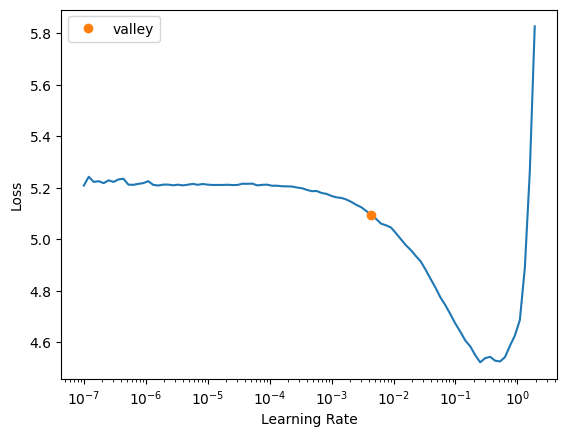

In [30]:
learnClass.lr_find()

Y a continuación aplicar fine tuning. 

/usr/local/lib/python3.9/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.9/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


Better model found at epoch 0 with valid_loss value: 1.7296338081359863.


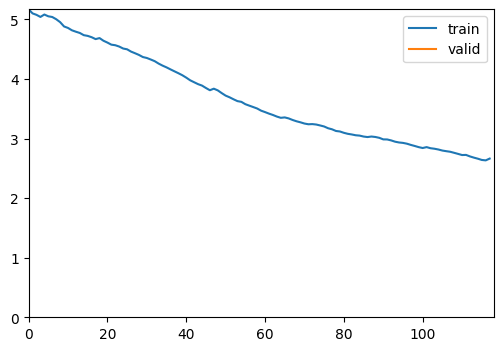

/usr/local/lib/python3.9/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.9/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


Better model found at epoch 0 with valid_loss value: 0.7328385710716248.


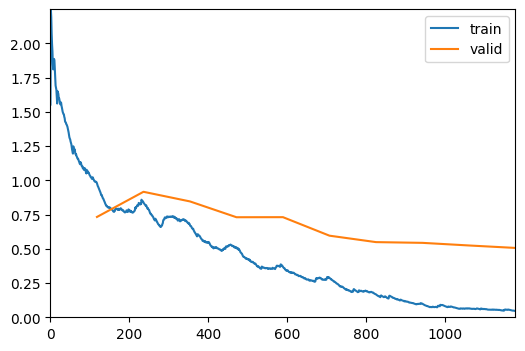

Better model found at epoch 3 with valid_loss value: 0.7307079434394836.
Better model found at epoch 5 with valid_loss value: 0.5960114002227783.
Better model found at epoch 6 with valid_loss value: 0.5489932298660278.
Better model found at epoch 7 with valid_loss value: 0.5436006188392639.
Better model found at epoch 8 with valid_loss value: 0.5244889855384827.
Better model found at epoch 9 with valid_loss value: 0.5064975023269653.


In [31]:
learnClass.fine_tune(10, 6e-2)

Ahora podemos usar nuestro modelo para predecir la clase de una nueva frase. 

In [32]:
learnClass.predict('with pale blue berries. in these peaceful shades--.')

/usr/local/lib/python3.9/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.9/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


('42',
 tensor(42),
 tensor([6.1113e-05, 3.4140e-06, 5.3438e-08, 6.2474e-07, 1.7562e-07, 1.8319e-04,
         7.3557e-09, 7.5409e-09, 1.4656e-06, 1.7566e-04, 1.3840e-05, 4.2550e-09,
         1.3802e-09, 8.7871e-10, 9.8407e-08, 2.7898e-07, 1.5222e-04, 9.9282e-07,
         3.3463e-07, 2.7594e-05, 1.4694e-08, 1.3287e-07, 3.0450e-07, 5.2692e-07,
         7.8050e-07, 6.2470e-08, 3.3111e-08, 1.5844e-07, 1.2301e-06, 2.4226e-06,
         4.8855e-07, 6.1708e-07, 3.2115e-09, 9.2302e-09, 1.1573e-07, 1.0924e-08,
         2.7457e-07, 2.5876e-07, 1.5623e-07, 6.7291e-07, 1.2329e-06, 2.6838e-09,
         9.9911e-01, 3.3957e-07, 8.0291e-10, 3.5584e-08, 6.4111e-07, 1.7399e-07,
         1.3064e-07, 5.9979e-08, 9.4901e-08, 5.9597e-08, 5.8993e-08, 1.6217e-07,
         5.0505e-07, 1.2821e-07, 7.6527e-09, 5.9862e-09, 1.3971e-06, 9.2649e-08,
         2.1495e-09, 8.4540e-07, 1.0286e-05, 1.6611e-07, 3.6453e-08, 1.8690e-07,
         5.4414e-07, 3.1302e-08, 1.5286e-08, 3.6581e-10, 4.6303e-08, 8.9668e-07,
        

Por último, podemos validar nuestro modelo en el conjunto de test, para lo cuál hay que combinar los dataframes y construir un nuevo dataloader. 

In [34]:
test_df['set']=True
train_test_df = pd.concat([train_df,test_df])
dls_test = sentiment_clas.dataloaders(train_test_df, bs=64)

Modificamos ahora el dataloader de nuestro learner, y procedemos a validar.

In [35]:
learnClass.dls = dls_test
learnClass.validate()

/usr/local/lib/python3.9/dist-packages/torch/amp/autocast_mode.py:204: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
/usr/local/lib/python3.9/dist-packages/torch/cuda/amp/grad_scaler.py:120: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


Better model found at epoch 0 with valid_loss value: 0.8236363530158997.


(#2) [1.1376911401748657,0.8236363530158997]